The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data
nobel_path = 'data/nobel.csv'
nobel = pd.read_csv(nobel_path)
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### Who is the most commonly awarded gender and birth country?

C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


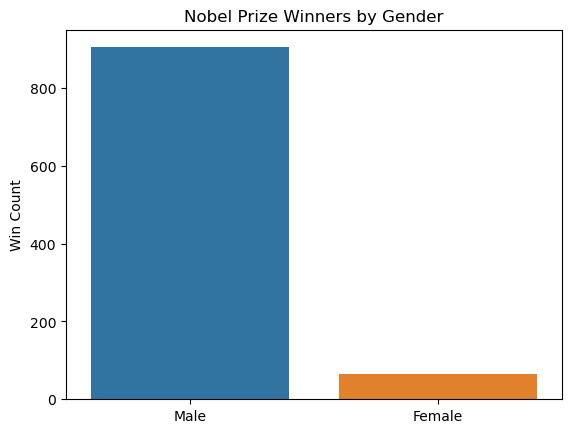

In [3]:
# Create a count plot of wins vs gender
plot = sns.countplot(x='sex', data=nobel)
plot.set_title('Nobel Prize Winners by Gender')
plot.set(xlabel=None, ylabel='Win Count')

# Show count plot
plt.show()

In [4]:
# Save top gender
top_gender = 'Male'

C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


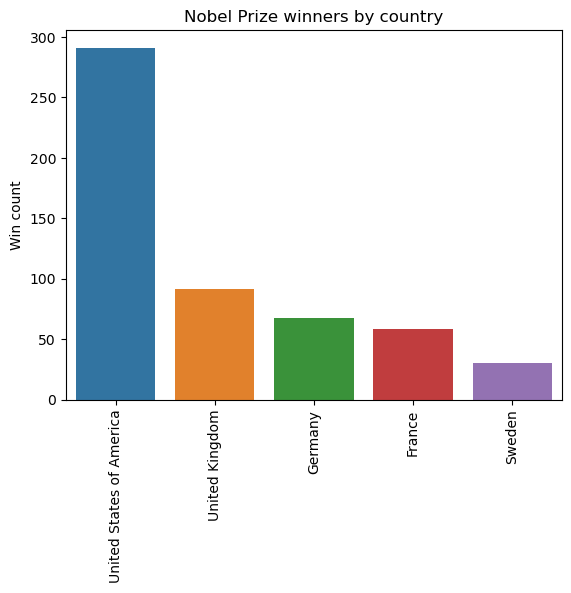

In [5]:
# Filter for top 5 countries
top_5_countries = nobel['birth_country'].value_counts().head()

# Create a count plot of wins vs country
plot = sns.barplot(x=top_5_countries.index, y=top_5_countries.values)
plot.set_title('Nobel Prize winners by country')
plot.set(xlabel=None, ylabel='Win count')
plt.xticks(rotation=90)

# Show count plot
plt.show()

In [6]:
# Save top country name
top_country = 'United States of America'

In [7]:
print(f'\
Top Gender: {top_gender}\n\
Top Country: {top_country}')

Top Gender: Male
Top Country: United States of America


### Which decade had the highest ratio of US-born Nobel Prize winners to toal winners in all categories?

In [8]:
# Create a function to determine the US win rate by decade
def us_ratio(col):
    us_wins = sum(col == 'United States of America')
    tot_wins = col.shape[0]
    return us_wins / tot_wins

# Create a decade column
nobel['decade'] = (nobel['year'] // 10) * 10

# Calculate US win ratio by decade
us_ratios = nobel.groupby('decade', as_index=False).agg(us_win_ratio = ('birth_country',us_ratio))

# Get the decade with the max win ratio
max_ratio_usa = us_ratios['us_win_ratio'].max()
max_decade_usa = us_ratios.loc[us_ratios['us_win_ratio'] == max_ratio_usa, 'decade'].item()

print(f'\
Decade of Max Ratio: {max_decade_usa}\n\
Max Ratio {max_ratio_usa}')

Decade of Max Ratio: 2000
Max Ratio 0.42276422764227645


C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

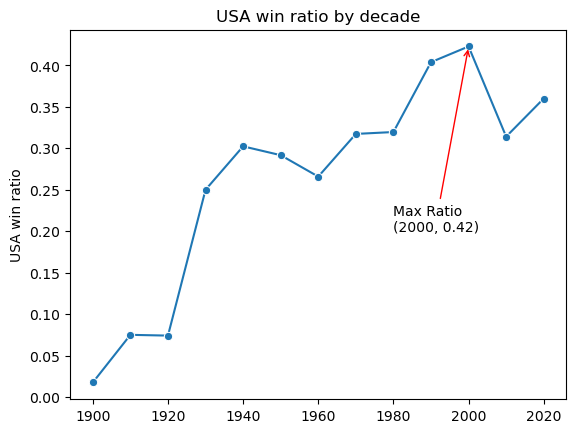

In [9]:
# Create annotation text
max_text = f'Max Ratio\n({max_decade_usa}, {round(max_ratio_usa, 2)})'

# Create a line plot showing US win rate by decade
plot = sns.lineplot(x='decade', y='us_win_ratio', data=us_ratios, marker='o')
plot.annotate(text=max_text, xy=(max_decade_usa, max_ratio_usa), xytext=(1980, 0.2), arrowprops={'arrowstyle':'->', 'color':'red'})
plot.set_title('USA win ratio by decade')
plot.set(xlabel=None, ylabel='USA win ratio')
plt.show()

### Which decade and Nobel Prize category had the highest proportion of female laureates.

In [10]:
# Create a function to determine the ratio of female laureates by decade
def fem_ratio(col):
    fem_wins = sum(col == 'Female')
    tot_wins = col.shape[0]
    return fem_wins / tot_wins

# Calculate female win ratio by decade
fem_cat_ratio = nobel.groupby(['decade', 'category'], as_index=False).agg(cat_ratio = ('sex', fem_ratio))

# Get the decade with the max female win ratio
max_ratio_fem = fem_cat_ratio['cat_ratio'].max()
max_decade_fem = fem_cat_ratio.loc[fem_cat_ratio['cat_ratio'] == max_ratio_fem, 'decade'].item()
max_cat_fem = fem_cat_ratio.loc[fem_cat_ratio['cat_ratio'] == max_ratio_fem, 'category'].item()

C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jalan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

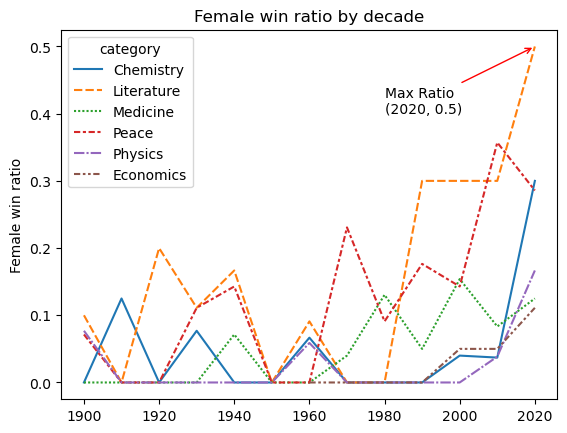

In [11]:
# Create annotation text
max_text = f'Max Ratio\n({max_decade_fem}, {round(max_ratio_fem, 2)})'

# Create a line plot showing female win ratio by decade
plot = sns.lineplot(x='decade', y='cat_ratio', data=fem_cat_ratio, hue='category', style='category')
plot.set_title('Female win ratio by decade')
plot.annotate(text=max_text, xy=(max_decade_fem, max_ratio_fem), xytext=(1980, 0.4), arrowprops={'arrowstyle':'->', 'color':'red'})
plot.set(xlabel=None, ylabel='Female win ratio')
plt.show()

In [12]:
print(f'\
Decade: {max_decade_fem}\n\
Category: {max_cat_fem}\n\
Female Win Rate: {max_ratio_fem}')

Decade: 2020
Category: Literature
Female Win Rate: 0.5


### Who was the first woman to receive a Nobel Prize, and in what category?

In [13]:
# Filter for the first woman that won
first_fem_win = nobel[nobel['sex'] == 'Female'].sort_values('year').head(1)
first_woman_name = first_fem_win['full_name'].iloc[0]
first_woman_category = first_fem_win['category'].iloc[0]

# Print results
print(f'\
First woman to win a Nobel Prize: {first_woman_name}\n\
Category: {first_woman_category}')

First woman to win a Nobel Prize: Marie Curie, née Sklodowska
Category: Physics


### Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [14]:
# Filter for individual that won more than once
repeat_list = nobel['full_name'].value_counts()
repeat_list = repeat_list[repeat_list > 1]
repeat_list

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Name: count, dtype: int64